In [ ]:
from sklearn.svm import SVR #svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive #구글 드라이브 연결
from pandas_datareader import data as pdr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
def preprocess_stock_data(df):
    # 누락된 값 처리
    df.fillna(method='ffill', inplace=True)

    # 너무 큰 값 수정
    threshold = 1.5  # 예시로 임의의 임계값 설정
    for column in df.columns:
        for i in range(1, len(df)):
            if abs(df[column][i] - df[column][i - 1]) > threshold * df[column][i - 1]:
                # 너무 큰 값이면 이전 값으로 대체
                df.at[i, column] = df.at[i - 1, column]

    return df

In [ ]:
# 트레이닝 데이터 불러오기
filename = '/content/drive/MyDrive/Given Data_10/06.xlsx'
df = pd.read_excel(filename, engine='openpyxl')
df.drop('Date', axis=1, inplace=True)
processed_df = preprocess_stock_data(df)
print(processed_df)

       Open    High     Low   Close      Adj Close   Volume
0    121000  121000  118000  118000  107800.984375   556532
1    118500  119000  115000  116000  105973.867188  1145187
2    116000  117000  115500  116000  105973.867188   334574
3    116500  117000  115500  115500  105517.078125   674196
4    115000  115500  111500  112000  102319.585938  1044825
..      ...     ...     ...     ...            ...      ...
938  186900  187000  181400  182800  182800.000000        0
939  182700  183700  182000  182000  182000.000000        0
940  180300  182500  178500  179500  179500.000000        0
941  181200  182900  174600  175600  175600.000000        0
942  175000  176300  171400  172500  172500.000000        0

[943 rows x 6 columns]


In [ ]:
fin = processed_df.tail(len(df)) #데이터 전체
stock_all = fin[['Open','High','Low','Close']].mean(axis=1) #시작가,종가,최고가,최저가 평균
stock_all = stock_all.values

stock_HL = fin[['High','Low']].mean(axis=1) #최고가,최저가 평균
stock_HL = stock_HL.values

stock_OC = fin[['Open','Close']].mean(axis=1) #시작가,종가 평균
stock_OC = stock_OC.values

stock_close = fin['Close'] #종가
stock_close = stock_close.values

In [ ]:
days = [] #임의로 데이터당 숫자 지정
for i in range(len(fin)):
  days.append([int(i)])
  i=i+1

In [ ]:
# 가중치 설정을 위한 배열 생성
weights = np.ones(len(stock_close))
weights[:800] = 0.7

In [ ]:
#stock_all
lin_svr_all = SVR(kernel='linear', C=7000) #커널을 linear로 설정
lin_svr_all.fit(days,stock_all,sample_weight=weights)

poly_svr_all = SVR(kernel='poly', C=7000, degree=5, coef0=1.0) #커널을 poly로 설정
poly_svr_all.fit(days,stock_all,sample_weight=weights)

rbf_svr_all = SVR(kernel='rbf',C=70000,gamma=0.2) #커널을 rbf로 설정
rbf_svr_all.fit(days,stock_all,sample_weight=weights)

SVR(C=70000, gamma=0.2)

In [ ]:
#stock_HL
lin_svr_HL = SVR(kernel='linear', C=7000) #커널을 linear로 설정
lin_svr_HL.fit(days,stock_HL,sample_weight=weights)

poly_svr_HL = SVR(kernel='poly', C=7000, degree=5, coef0=1.0) #커널을 poly로 설정
poly_svr_HL.fit(days,stock_HL,sample_weight=weights)

rbf_svr_HL = SVR(kernel='rbf',C=70000,gamma=0.2) #커널을 rbf로 설정
rbf_svr_HL.fit(days,stock_HL,sample_weight=weights)

SVR(C=70000, gamma=0.2)

In [ ]:
#stock_OC
lin_svr_OC = SVR(kernel='linear', C=7000) #커널을 linear로 설정
lin_svr_OC.fit(days,stock_OC,sample_weight=weights)

poly_svr_OC = SVR(kernel='poly', C=7000, degree=5, coef0=1.0) #커널을 poly로 설정
poly_svr_OC.fit(days,stock_OC,sample_weight=weights)

rbf_svr_OC = SVR(kernel='rbf',C=70000,gamma=0.2) #커널을 rbf로 설정
rbf_svr_OC.fit(days,stock_OC,sample_weight=weights)

SVR(C=70000, gamma=0.2)

In [ ]:
#stock_close
lin_svr_close = SVR(kernel='linear', C=7000) #커널을 linear로 설정
lin_svr_close.fit(days,stock_close,sample_weight=weights)

poly_svr_close = SVR(kernel='poly', C=7000, degree=5, coef0=1.0) #커널을 poly로 설정
poly_svr_close.fit(days,stock_close,sample_weight=weights)

rbf_svr_close = SVR(kernel='rbf',C=70000,gamma=0.2) #커널을 rbf로 설정
rbf_svr_close.fit(days,stock_close,sample_weight=weights)

SVR(C=70000, gamma=0.2)

In [ ]:
day = np.array([[len(fin) + 1]])
# lin_predictions = lin_svr.predict(day)
# poly_predictions = poly_svr.predict(day)
# rbf_predictions = rbf_svr.predict(day)

lin_all_predictions = lin_svr_all.predict(day)
poly_all_predictions = poly_svr_all.predict(day)
rbf_all_predictions = rbf_svr_all.predict(day)

lin_HL_predictions = lin_svr_HL.predict(day)
poly_HL_predictions = poly_svr_HL.predict(day)
rbf_HL_predictions = rbf_svr_HL.predict(day)

lin_OC_predictions = lin_svr_OC.predict(day)
poly_OC_predictions = poly_svr_OC.predict(day)
rbf_OC_predictions = rbf_svr_OC.predict(day)

lin_close_predictions = lin_svr_close.predict(day)
poly_close_predictions = poly_svr_close.predict(day)
rbf_close_predictions = rbf_svr_close.predict(day)

In [ ]:
print('다음 날 예측 (linear,all): ', lin_all_predictions)
print('다음 날 예측 (polynomial,all): ', poly_all_predictions)
print('다음 날 예측 (RBF,all): ', rbf_all_predictions)
print('---------------------------------------------')
print('다음 날 예측 (linear,HL): ', lin_HL_predictions)
print('다음 날 예측 (polynomial,HL): ', poly_HL_predictions)
print('다음 날 예측 (RBF,HL): ', rbf_HL_predictions)
print('---------------------------------------------')
print('다음 날 예측 (linear,OC): ', lin_OC_predictions)
print('다음 날 예측 (polynomial,OC): ', poly_OC_predictions)
print('다음 날 예측 (RBF,OC): ', rbf_OC_predictions)
print('---------------------------------------------')
print('다음 날 예측 (linear,close): ', lin_close_predictions)
print('다음 날 예측 (polynomial,close): ', poly_close_predictions)
print('다음 날 예측 (RBF,close): ', rbf_close_predictions)

다음 날 예측 (linear,all):  [194261.20317699]
다음 날 예측 (polynomial,all):  [187188.20654299]
다음 날 예측 (RBF,all):  [172972.65357704]
---------------------------------------------
다음 날 예측 (linear,HL):  [194040.18731978]
다음 날 예측 (polynomial,HL):  [187349.14479247]
다음 날 예측 (RBF,HL):  [173220.28113867]
---------------------------------------------
다음 날 예측 (linear,OC):  [194667.43471129]
다음 날 예측 (polynomial,OC):  [187121.23607599]
다음 날 예측 (RBF,OC):  [172418.19806451]
---------------------------------------------
다음 날 예측 (linear,close):  [194993.30279137]
다음 날 예측 (polynomial,close):  [186714.84692141]
다음 날 예측 (RBF,close):  [175934.97802684]


In [ ]:
final_prediction = (lin_all_predictions + poly_all_predictions + rbf_all_predictions) / 3 #모델3개값 평균값
print('최종 예측 값:',final_prediction)

최종 예측 값: [184807.35443234]


all

In [ ]:
#MSE
# 실제 다음 날 종가 값
actual_next_day_close = df.iloc[-1]['Close']

# 각 모델의 예측값과 실제값 간의 MSE 계산
lin_all_mse = mean_squared_error([actual_next_day_close], lin_all_predictions)
poly_all_mse = mean_squared_error([actual_next_day_close], poly_all_predictions)
rbf_all_mse = mean_squared_error([actual_next_day_close], rbf_all_predictions)

print('Linear 모델 MSE:', lin_all_mse)
print('Polynomial 모델 MSE:', poly_all_mse)
print('RBF 모델 MSE:', rbf_all_mse)

Linear 모델 MSE: 473549963.71007144
Polynomial 모델 MSE: 215743411.4493982
RBF 모델 MSE: 223401.4038914658


In [ ]:
#R2
lin_all_predictionss = lin_svr_all.predict(days)
poly_all_predictionss = poly_svr_all.predict(days)
rbf_all_predictionss = rbf_svr_all.predict(days)

lin_all_r2 = r2_score(stock_close, lin_all_predictionss, sample_weight=weights)
poly_all_r2 = r2_score(stock_close, poly_all_predictionss, sample_weight=weights)
rbf_all_r2 = r2_score(stock_close, rbf_all_predictionss, sample_weight=weights)

print('R2 스코어 (linear): ', lin_all_r2)
print('R2 스코어 (polynomial): ', poly_all_r2)
print('R2 스코어 (RBF): ', rbf_all_r2)

R2 스코어 (linear):  0.10674129804600463
R2 스코어 (polynomial):  0.771775641719622
R2 스코어 (RBF):  0.9981338478600913


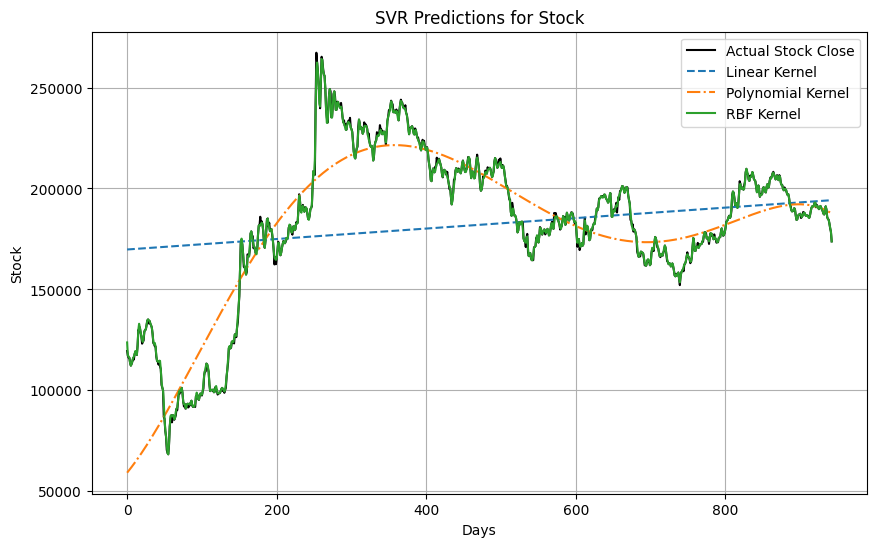

In [ ]:
new_days = np.arange(len(fin))

# 예측값의 길이를 new_days와 동일하도록 조정
lin_all_predictions.reshape(-1, 1)
poly_all_predictions.reshape(-1, 1)
rbf_all_predictions.reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.plot(days, stock_close, label='Actual Stock All', color='black')

plt.plot(new_days, lin_all_predictionss, label='Linear Kernel', linestyle='--')
plt.plot(new_days, poly_all_predictionss, label='Polynomial Kernel', linestyle='-.')
plt.plot(new_days, rbf_all_predictionss, label='RBF Kernel', linestyle='-')

plt.xlabel('Days')
plt.ylabel('Stock')
plt.title('SVR Predictions for Stock')
plt.legend()
plt.grid(True)
plt.show()

HL

In [ ]:
#MSE
# 실제 다음 날 종가 값
actual_next_day_close = df.iloc[-1]['Close']

# 각 모델의 예측값과 실제값 간의 MSE 계산
lin_HL_mse = mean_squared_error([actual_next_day_close], lin_HL_predictions)
poly_HL_mse = mean_squared_error([actual_next_day_close], poly_HL_predictions)
rbf_HL_mse = mean_squared_error([actual_next_day_close], rbf_HL_predictions)

print('Linear 모델 MSE:', lin_HL_mse)
print('Polynomial 모델 MSE:', poly_HL_mse)
print('RBF 모델 MSE:', rbf_HL_mse)

Linear 모델 MSE: 463979669.77138543
Polynomial 모델 MSE: 220497101.0678151
RBF 모델 MSE: 518804.91872797254


In [ ]:
#R2
lin_HL_predictionss = lin_svr_HL.predict(days)
poly_HL_predictionss = poly_svr_HL.predict(days)
rbf_HL_predictionss = rbf_svr_HL.predict(days)

lin_HL_r2 = r2_score(stock_close, lin_HL_predictionss, sample_weight=weights)
poly_HL_r2 = r2_score(stock_close, poly_HL_predictionss, sample_weight=weights)
rbf_HL_r2 = r2_score(stock_close, rbf_HL_predictionss, sample_weight=weights)

print('R2 스코어 (linear): ', lin_HL_r2)
print('R2 스코어 (polynomial): ', poly_HL_r2)
print('R2 스코어 (RBF): ', rbf_HL_r2)

R2 스코어 (linear):  0.10614245294023028
R2 스코어 (polynomial):  0.7715601452240959
R2 스코어 (RBF):  0.9979991029142551


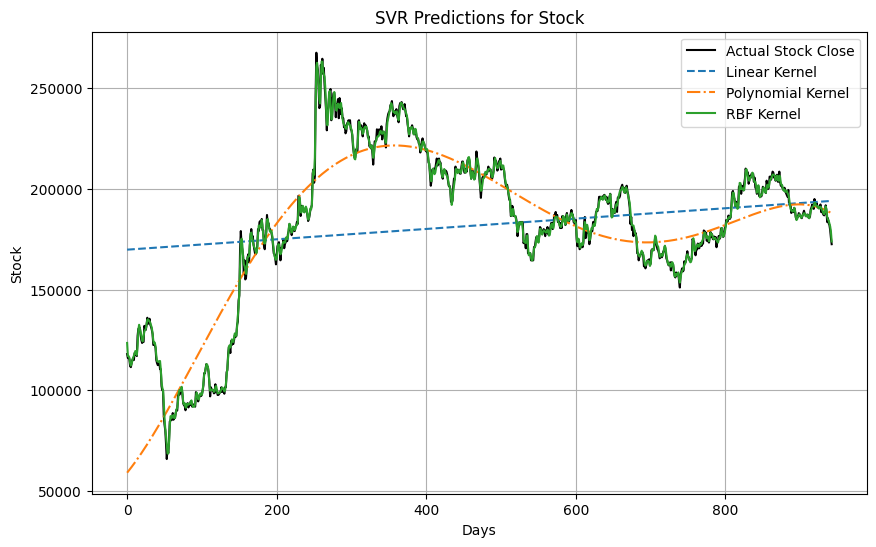

In [ ]:
new_days = np.arange(len(fin))

# 예측값의 길이를 new_days와 동일하도록 조정
lin_HL_predictions.reshape(-1, 1)
poly_HL_predictions.reshape(-1, 1)
rbf_HL_predictions.reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.plot(days, stock_close, label='Actual Stock Close', color='black')

plt.plot(new_days, lin_HL_predictionss, label='Linear Kernel', linestyle='--')
plt.plot(new_days, poly_HL_predictionss, label='Polynomial Kernel', linestyle='-.')
plt.plot(new_days, rbf_HL_predictionss, label='RBF Kernel', linestyle='-')

plt.xlabel('Days')
plt.ylabel('Stock')
plt.title('SVR Predictions for Stock')
plt.legend()
plt.grid(True)
plt.show()

OC

In [ ]:
#MSE
# 실제 다음 날 종가 값
actual_next_day_close = df.iloc[-1]['Close']

# 각 모델의 예측값과 실제값 간의 MSE 계산
lin_OC_mse = mean_squared_error([actual_next_day_close], lin_OC_predictions)
poly_OC_mse = mean_squared_error([actual_next_day_close], poly_OC_predictions)
rbf_OC_mse = mean_squared_error([actual_next_day_close], rbf_OC_predictions)

print('Linear 모델 MSE:', lin_OC_mse)
print('Polynomial 모델 MSE:', poly_OC_mse)
print('RBF 모델 MSE:', rbf_OC_mse)

Linear 모델 MSE: 491395161.67916024
Polynomial 모델 MSE: 213780544.38993073
RBF 모델 MSE: 6691.556650003381


In [ ]:
#R2
lin_OC_predictionss = lin_svr_OC.predict(days)
poly_OC_predictionss = poly_svr_OC.predict(days)
rbf_OC_predictionss = rbf_svr_OC.predict(days)

lin_OC_r2 = r2_score(stock_close, lin_OC_predictionss, sample_weight=weights)
poly_OC_r2 = r2_score(stock_close, poly_OC_predictionss, sample_weight=weights)
rbf_OC_r2 = r2_score(stock_close, rbf_OC_predictionss, sample_weight=weights)

print('R2 스코어 (linear): ', lin_OC_r2)
print('R2 스코어 (polynomial): ', poly_OC_r2)
print('R2 스코어 (RBF): ', rbf_OC_r2)

R2 스코어 (linear):  0.10938469866365708
R2 스코어 (polynomial):  0.7709415441226876
R2 스코어 (RBF):  0.9980822855964746


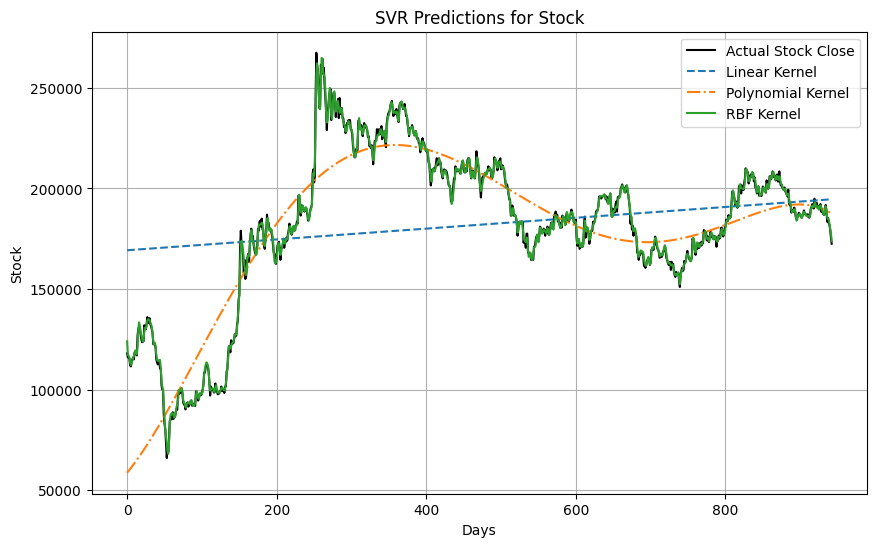

In [ ]:
new_days = np.arange(len(fin))

# 예측값의 길이를 new_days와 동일하도록 조정
lin_OC_predictions.reshape(-1, 1)
poly_OC_predictions.reshape(-1, 1)
rbf_OC_predictions.reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.plot(days, stock_close, label='Actual Stock Close', color='black')

plt.plot(new_days, lin_OC_predictionss, label='Linear Kernel', linestyle='--')
plt.plot(new_days, poly_OC_predictionss, label='Polynomial Kernel', linestyle='-.')
plt.plot(new_days, rbf_OC_predictionss, label='RBF Kernel', linestyle='-')

plt.xlabel('Days')
plt.ylabel('Stock')
plt.title('SVR Predictions for Stock')
plt.legend()
plt.grid(True)
plt.show()

close

In [ ]:
#MSE
# 실제 다음 날 종가 값
actual_next_day_close = df.iloc[-1]['Close']

# 각 모델의 예측값과 실제값 간의 MSE 계산
lin_close_mse = mean_squared_error([actual_next_day_close], lin_close_predictions)
poly_close_mse = mean_squared_error([actual_next_day_close], poly_close_predictions)
rbf_close_mse = mean_squared_error([actual_next_day_close], rbf_close_predictions)

print('Linear 모델 MSE:', lin_close_mse)
print('Polynomial 모델 MSE:', poly_close_mse)
print('RBF 모델 MSE:', rbf_close_mse)

Linear 모델 MSE: 505948670.4643499
Polynomial 모델 MSE: 202061872.99916416
RBF 모델 MSE: 11799074.044888958


In [ ]:
#R2
lin_close_predictionss = lin_svr_close.predict(days)
poly_close_predictionss = poly_svr_close.predict(days)
rbf_close_predictionss = rbf_svr_close.predict(days)

lin_close_r2 = r2_score(stock_close, lin_close_predictionss, sample_weight=weights)
poly_close_r2 = r2_score(stock_close, poly_close_predictionss, sample_weight=weights)
rbf_close_r2 = r2_score(stock_close, rbf_close_predictionss, sample_weight=weights)

print('R2 스코어 (linear): ', lin_close_r2)
print('R2 스코어 (polynomial): ', poly_close_r2)
print('R2 스코어 (RBF): ', rbf_close_r2)

R2 스코어 (linear):  0.11068221968503622
R2 스코어 (polynomial):  0.7729670062686166
R2 스코어 (RBF):  0.9984131994095917


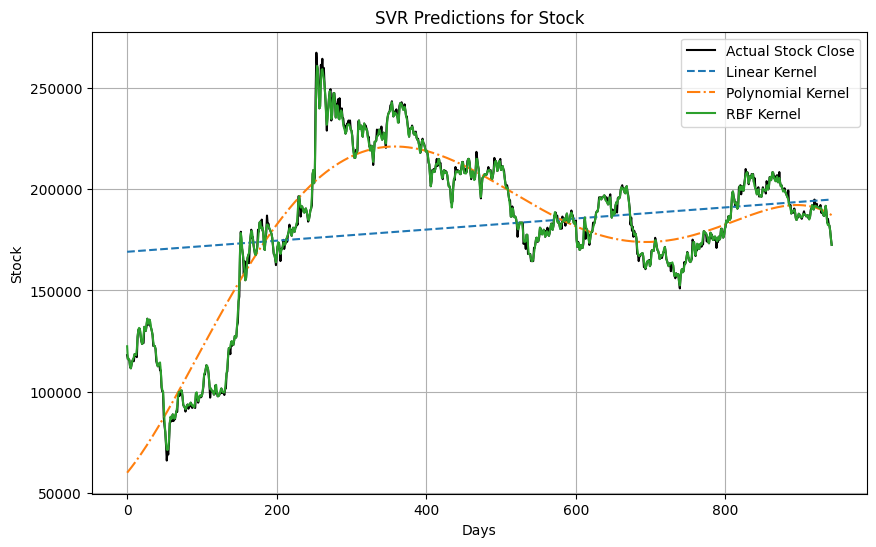

In [ ]:
new_days = np.arange(len(fin))

# 예측값의 길이를 new_days와 동일하도록 조정
lin_close_predictions.reshape(-1, 1)
poly_close_predictions.reshape(-1, 1)
rbf_close_predictions.reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.plot(days, stock_close, label='Actual Stock Close', color='black')

plt.plot(new_days, lin_close_predictionss, label='Linear Kernel', linestyle='--')
plt.plot(new_days, poly_close_predictionss, label='Polynomial Kernel', linestyle='-.')
plt.plot(new_days, rbf_close_predictionss, label='RBF Kernel', linestyle='-')

plt.xlabel('Days')
plt.ylabel('Stock')
plt.title('SVR Predictions for Stock')
plt.legend()
plt.grid(True)
plt.show()